<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/225_likelihood.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(cap-likelihood)=
# La verosimiglianza 

```{admonition} Obiettivi di apprendimento
Dopo aver completato questo capitolo, sarai in grado di:

- Comprendere il concetto di verosimiglianza e il suo ruolo nella dei parametri.
- Generare grafici della funzione di verosimiglianza binomiale.
- Generare grafici della funzione di verosimiglianza del modello gaussiano.
- Interpretare i grafici della funzione di verosimiglianza.
- Comprendere il concetto di stima di massima verosimiglianza.
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

## La funzione di verosimiglianza

Come spesso accade in statistica, il nostro obiettivo è stimare un parametro del modello utilizzando i dati a nostra disposizione. Per fare ciò, una delle metodologie più comuni è la stima di massima verosimiglianza nel contesto frequentista.

La stima di massima verosimiglianza si basa sulla definizione della funzione di verosimiglianza, che misura quanto i nostri dati siano verosimili per un determinato valore del parametro. La funzione di verosimiglianza viene utilizzata sia nel paradigma bayesiano che in quello frequentista.

La differenza tra la funzione di probabilità (o densità) e la funzione di verosimiglianza sta nell'obiettivo. Nella funzione di probabilità, i parametri $\theta$ sono noti e la funzione viene utilizzata per calcolare la probabilità (o densità di probabilità) dei dati $y$. Nella funzione di verosimiglianza, invece, i dati $y$ sono noti e la funzione viene utilizzata per determinare quale valore del parametro $\theta$ sia più verosimile alla luce dei dati osservati.

La funzione di probabilità è indicata come $P(y \mid \theta)$, dove $y$ rappresenta il valore della variabile casuale e $\theta$ rappresenta il parametro che descrive la distribuzione di probabilità. Ad esempio, $P(y \mid \theta)$ potrebbe rappresentare la probabilità di ottenere il valore $y$ da una distribuzione con parametro $\theta$. In alternativa, nel caso di una densità di probabilità, si utilizza la notazione $p(y \mid \theta)$.

Per la funzione di verosimiglianza, è consuetudine utilizzare la lettera $L$. Quindi, possiamo scrivere:

$$
L(y_1, \ldots, y_n \mid \theta) = P(y_1, \ldots, y_n | \theta).
$$

In questa formula, $L(y_1, \ldots, y_n \mid \theta)$ rappresenta la funzione di verosimiglianza, che dipende dai dati osservati $y_1, \ldots, y_n$, mentre $P(y_1, \ldots, y_n \mid \theta)$ rappresenta la densità di probabilità congiunta dei dati.

La funzione di verosimiglianza, a differenza di una funzione di densità di probabilità, non è normalizzata per avere un'area unitaria. Ciò significa che la funzione di verosimiglianza fornisce solo informazioni relative sulla plausibilità dei diversi valori del parametro $\theta$ e non fornisce una misura di probabilità assoluta. In altre parole, la funzione di verosimiglianza ci indica quale valore del parametro $\theta$ sia più plausibile alla luce dei dati osservati, ma non ci fornisce una stima diretta della probabilità assoluta di tale valore.

## Modello binomiale

Facciamo un esempio relativo alla distribuzione binomiale. Consideriamo un esperimento ripetuto $n$ volte, in cui ogni prova può avere due risultati possibili, successo o fallimento (ad esempio, lanciare una moneta). Supponiamo di aver ottenuto $y$ successi e $n-y$ fallimenti. La funzione binomiale che descrive la probabilità di ottenere esattamente $y$ successi è definita come:

$$
P(Y=y) = \binom{n}{y} \theta^y (1-\theta)^{n-y},
$$

dove $\theta$ rappresenta la probabilità di successo in ogni singola prova bernoulliana, $y$ è il numero di successi e $n$ è il numero totale di prove indipendenti considerate.

La funzione di verosimiglianza rappresenta la plausibilità relativa di osservare i dati $y$ al variare dei possibili valori di $\theta$. Concettualmente, consideriamo diversi valori possibili per il nostro parametro, $\theta$, e determiniamo quanto sarebbe plausibile osservare i nostri dati in ciascun caso. La funzione di verosimiglianza è data dalla seguente formula:

$$
\mathcal{L}(\theta \mid y) = \binom{n}{y} \theta^y (1-\theta)^{n-y} = \theta^y (1-\theta)^{n - y},
$$

dove possiamo trascurare il coefficiente binomiale in quanto non dipende da $\theta$.

Per fare un esempio pratico, consideriamo la ricerca di {cite:t}`zetsche_2019future`. Questi ricercatori hanno trovato che, su 30 pazienti clinicamente depressi, 23 manifestavano delle aspettative distorte negativamente relativamente al loro umore futuro. Per i dati di {cite:t}`zetsche_2019future`, la funzione di verosimiglianza corrisponde dunque alla funzione binomiale di parametro $\theta \in [0, 1]$ sconosciuto. Avendo osservato $y$ = 23 successi, in $n$ = 30 prove, la funzione di verosimiglianza diventa

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} \theta^{23} + (1-\theta)^7.
$$ (eq-likebino23)

Per costruire la funzione di verosimiglianza, è necessario applicare l'eq. {eq}`eq-likebino23` diverse volte, variando ogni volta il valore di $\theta$, ma mantenendo costanti i valori dei dati. Nella simulazione seguente, considereremo 100 valori possibili per $\theta$ nell'intervallo [0, 1]. Iniziamo definendo i dati.

In [3]:
n = 30
y = 23

Creiamo ora i possibili valori del parametro $\theta$ per i quali calcoleremo la verosimiglianza.

In [4]:
theta = np.linspace(0.0, 1.0, num=100)
print(theta)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

Per esempio, ponendo $\theta = 0.1$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.1^{23} + (1-0.1)^7.
$$

In [5]:
stats.binom.pmf(y, n, 0.1)

9.7371682902e-18

Ponendo $\theta = 0.2$ otteniamo il seguente valore dell'ordinata della funzione di verosimiglianza:

$$
\mathcal{L}(\theta \mid y) = \frac{(23 + 7)!}{23!7!} 0.2^{23} + (1-0.2)^7.
$$

In [6]:
stats.binom.pmf(y, n, 0.2)

3.58141723492221e-11

Se ripetiamo questo processo 100 volte, una volta per ciascuno dei valori $\theta$ che abbiamo elencato sopra, otteniamo 100 coppie di punti $\theta$ e $f(\theta)$. A tale fine, definiamo la seguente funzione.

In [7]:
def like(r, n, theta):
    return math.comb(n, r) * theta**r * (1 - theta) ** (n - r)


La curva che interpola i punti ottenuti è la funzione di verosimiglianza, come indicato dalla figura seguente.

Text(0, 0.5, 'Verosimiglianza')

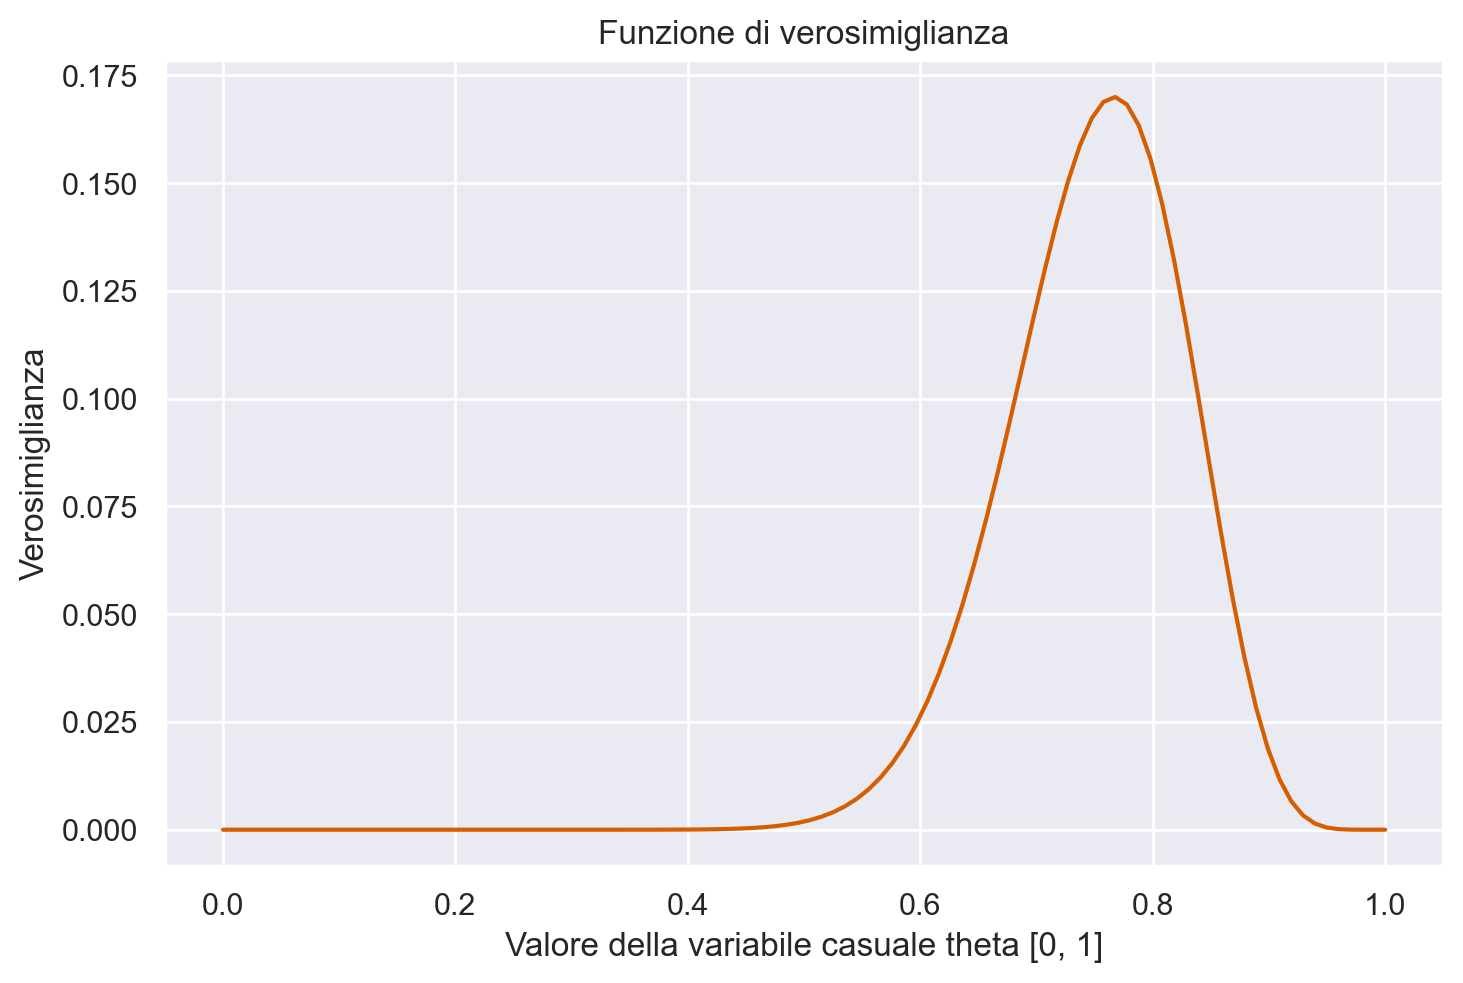

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(theta, like(r=y, n=n, theta=theta), "r-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");


### Interpretazione

Si osservi che la verosimiglianza, $p(Y \mid θ) = L(θ)$, rappresenta una funzione del parametro θ. Essa assume valori diversi per diversi valori di θ: alcuni valori di θ generano verosimiglianze basse, mentre altri generano valori più alti. Pertanto, la funzione di verosimiglianza fornisce informazioni sull'adeguatezza dei diversi valori di θ in relazione ai dati raccolti. Il valore di θ che massimizza la funzione di verosimiglianza rappresenta il valore più plausibile dato i dati osservati. Nel nostro caso, il valore di θ più plausibile tra quelli considerati è 23/30 = 0.767, che corrisponde alla moda della funzione di verosimiglianza.

Per determinare il valore di $\theta$ che massimizza la funzione di verosimiglianza, è possibile identificare l'indice nel vettore che contiene i valori della funzione di verosimiglianza in cui la verosimiglianza è massima. Per ottenere tale risultato, è possibile utilizzare la funzione `argmax` di NumPy. Una volta ottenuto l'indice corrispondente, è possibile recuperare il valore di $\theta$ associato nel vettore `theta`. In questo modo, otterremo il valore di $\theta$ che massimizza la funzione di verosimiglianza.

In [9]:
l = like(r=y, n=n, theta=theta)
l.argmax()

76

In [10]:
theta[76]

0.7676767676767677

È importante notare che, invece di utilizzare la funzione `like()` che abbiamo definito precedentemente per motivi didattici, è possibile ottenere lo stesso risultato utilizzando in modo equivalente la funzione `binom.pmf()`. 

Text(0, 0.5, 'Verosimiglianza')

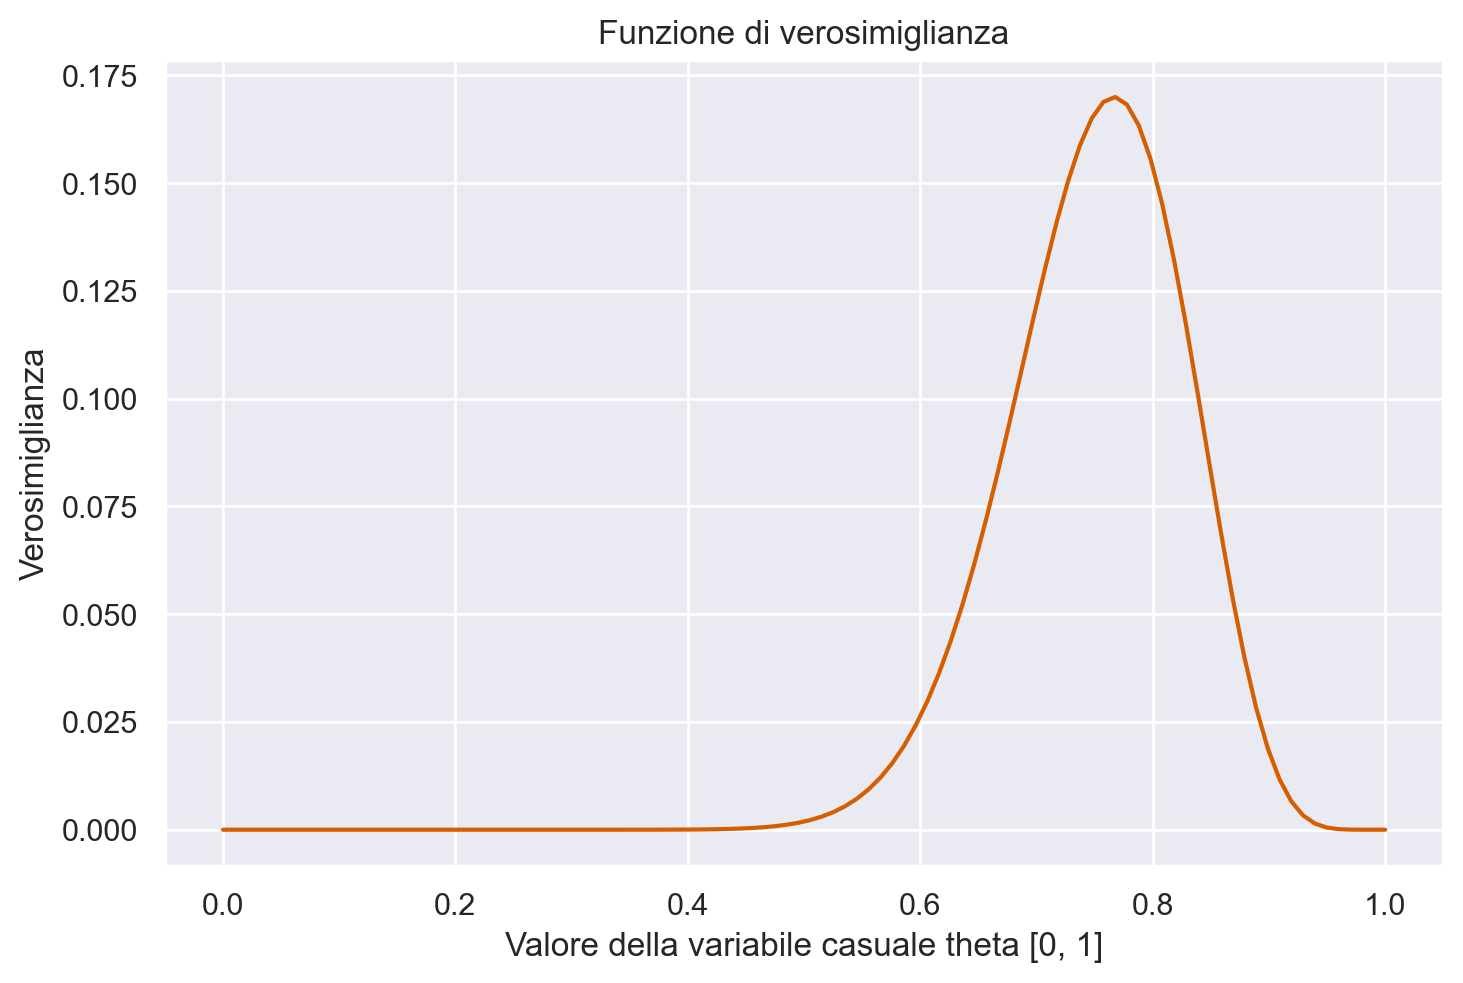

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(theta, stats.binom.pmf(y, n, theta), "r-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Verosimiglianza");

### La log-verosimiglianza

Dal punto di vista pratico risulta più conveniente utilizzare, al posto della funzione di verosimiglianza, il suo logaritmo naturale, ovvero la funzione di log-verosimiglianza:

$$
\ell(\theta) = \log \mathcal{L}(\theta).
$$ (eq-loglike-definition)

Poiché il logaritmo è una funzione strettamente crescente (usualmente si considera il logaritmo naturale), allora $\mathcal{L}(\theta)$ e $\ell(\theta)$ assumono il massimo (o i punti di massimo) in corrispondenza degli stessi valori di $\theta$:

$$
\hat{\theta} = argmax_{\theta \in \Theta} \ell(\theta) = argmax_{\theta \in \Theta} \mathcal{L}(\theta).
$$

Per le proprietà del logaritmo, la funzione nucleo di log-verosimiglianza della binomiale è

$$
\begin{aligned}
\ell(\theta \mid y) &= \log \mathcal{L}(\theta \mid y) \notag\\
          &= \log \left(\theta^y (1-\theta)^{n - y} \right) \notag\\
          &= \log \theta^y + \log \left( (1-\theta)^{n - y} \right) \notag\\
          &= y \log \theta + (n - y) \log (1-\theta).\notag
\end{aligned}
$$

È importante sottolineare che non è strettamente necessario lavorare con i logaritmi, ma è altamente raccomandato. La ragione principale è che i valori di verosimiglianza, che rappresentano il prodotto di numeri di probabilità molto piccoli, possono diventare estremamente piccoli, anche dell'ordine di $10^{-34}$. In queste circostanze, è comune che i programmi informatici incontrino problemi di arrotondamento numerico e che si verifichino errori nei calcoli. Utilizzando la trasformazione logaritmica, si evita questo problema, poiché i prodotti diventano somme e i valori diventano più gestibili in termini di scala numerica.

Svolgiamo nuovamente il problema precedente usando la log-verosimiglianza per trovare il massimo della funzione di log-verosimiglianza. Ora utilizziamo la funzione `binom.logpmf()`.

La funzione di log-verosimiglianza è rappresentata nella figura successiva.

Text(0, 0.5, 'Log-verosimiglianza')

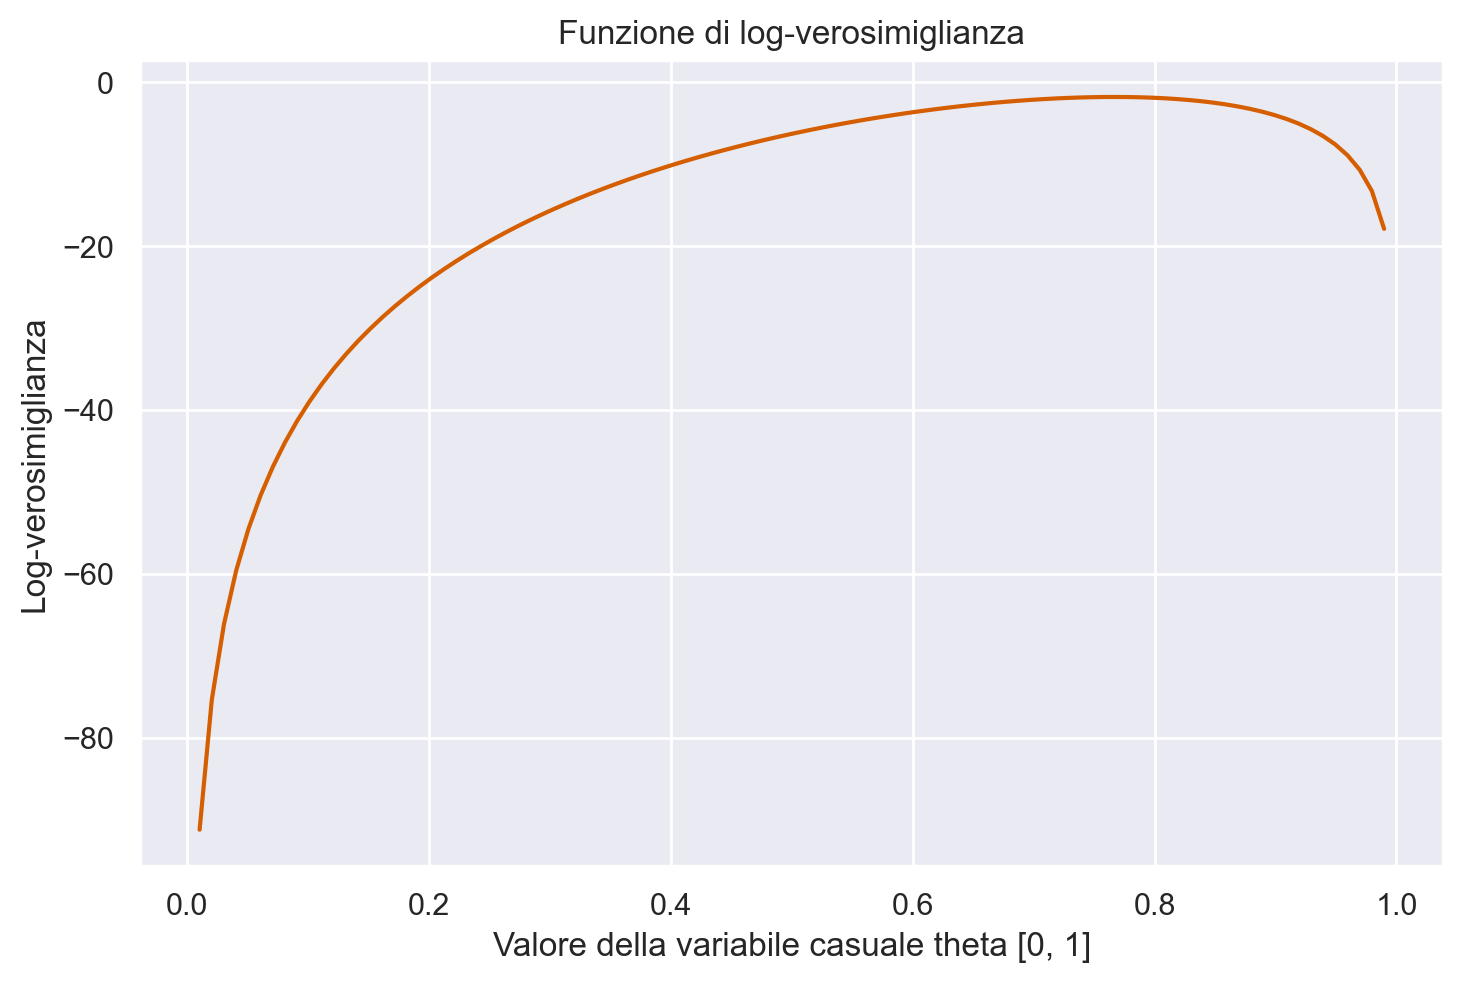

In [12]:
n = 30
r = 23
plt.figure(figsize=(10, 6))
plt.plot(theta, stats.binom.logpmf(y, n, theta), "r-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale theta [0, 1]")
plt.ylabel("Log-verosimiglianza");

Il risultato replica quello trovato in precedenza con la funzione di verosimiglianza.


In [13]:
ll = stats.binom.logpmf(y, n, theta)
ll.argmax()

76

In [14]:
theta[76]

0.7676767676767677

### Verosimiglianza congiunta di n campioni iid da una distribuzione binomiale

Nell'esempio precedente, abbiamo considerato la verosimiglianza per una singola osservazione binomiale. Per generalizzare quanto abbiamo finora, consideriamo nuovamente la distribuzione di probabilità binomiale $p(y |\mid θ)$ la cui forma è determinata dal parametro θ. Abbiamo visto come la verosimiglianza $L(θ)$ sia definita come $p(y = Y \mid θ)$, ottenuta sostituendo il valore puntuale $Y$ nella distribuzione di probabilità. Ora, consideriamo $n$ realizzazioni indipendenti e identicamente distribuite (iid) di una distribuzione binomiale rappresentate da un vettore di variabili casuali $Y = [y_1, y_2, \dots, y_n]$. In questo caso, $p(y \mid θ)$ corrisponde alla distribuzione congiunta $p(y_1, y_2, ..., y_n \mid θ)$. Poiché $y_1, y_2, \dots, y_n$ sono indipendenti, la distribuzione congiunta può essere espressa come:

$$
\begin{align}
p(y_1, y_2, \dots, y_n \mid \theta) &= p(y_1 \mid \theta) \times p(y_2 \mid \theta) \times\dots\times p(y_n \mid \theta)\notag\\
&= Binomiale(y_1 \mid \theta) \times Binomiale(y_2 \mid \theta) \times\dots\times Binomiale(y_n \mid \theta).\notag
\end{align}
$$

Sostituendo i dati $Y[1], \dots, Y[n]$ in questa distribuzione, otteniamo la verosimiglianza $p(y = Y \mid θ)$ per le $n$ realizzazioni iid di una distribuzione binomiale.


## Modello gaussiano

Estendiamo ora la discussione precedente al caso gaussiano. Inizieremo calcolando la verosimiglianza per il modello gaussiano dato un singolo valore puntuale $Y$. Successivamente, considereremo il caso di un campione casuale indipendente di osservazioni gaussiane.

Definiamo la funzione di verosimiglianza per la distribuzione gaussiana con i parametri $\mu$ e $\sigma$ come segue:

$$
\begin{aligned}
L = f(Y \mid\theta) &= f(y_1\mid \theta) f(y_2\mid\theta),\dots, f(y_n\mid\theta) \\
&= \prod^n_{j=1}f(Y\mid\mu,\sigma^2) \\
&= (2\pi\sigma^2)^{-n/2} \exp{\big(-\frac{1}{2\sigma^2} \sum^n_{j=1}(y_i-\mu)^2\big)}.
\end{aligned}
$$(eq-gaussian-sim-like)

### Una singola osservazione

Per ottenere la funzione di verosimiglianza dell'eq. {eq}`eq-gaussian-sim-like`, esaminiamo inizialmente il caso in cui i dati corrispondono ad una singola osservazione $y$.

Supponiamo che la variabile casuale $y$ rappresenti il quoziente di intelligenza. Poniamo

In [15]:
y = 114

L'eq. {eq}`eq-gaussian-sim-like` dipende dai parametri $\mu$ e $\sigma$ e dai dati $y$. Per semplicità, ipotizziamo $\sigma$ noto e uguale a 15. Nell'esercizio considereremo 1000 valori $\mu$ compresi tra 70 e 160.

In [16]:
mu = np.linspace(70.0, 160.0, num=1000)

Poiché stiamo esaminando 1000 potenziali valori per il parametro $\mu$, per costruire la funzione di verosimiglianza dobbiamo applicare l'equazione {eq}`eq-gaussian-sim-like` 1000 volte - una volta per ciascuno dei valori $\mu$ che stiamo prendendo in considerazione. In questo modo, possiamo valutare la verosimiglianza relativa di osservare i dati che abbiamo raccolto, dati i diversi valori possibili per $\mu$.

In ciascun passo dell'esercizio inseriremo nell'eq. {eq}`eq-gaussian-sim-like`

-   il singolo valore $y$ considerato (che viene mantenuto costante),
-   il valore $\sigma$ assunto noto (anch'esso costante),
-   uno alla volta ciascuno dei valori $\mu$ che abbiamo definito.

Quindi, nelle 1000 applicazioni dell'eq. {eq}`eq-gaussian-sim-like`, il valore $\mu$ è l'unico che varia: $y$ e $\sigma$ sono mantenuti costanti.

In Python, la distribuzione gaussiana può essere implementata attraverso la funzione `norm.pdf()`. Tale funzione richiede tre argomenti: il valore o il vettore di valori $y$ da valutare, la media $\mu$ (o i valori delle medie, se si lavora con più distribuzioni gaussiane) e la deviazione standard $\sigma$ (o i valori delle deviazioni standard, se si lavora con più distribuzioni gaussiane). In altre parole, la funzione `norm.pdf()` consente di calcolare la densità di probabilità gaussiana per ogni valore di $y$ e per ogni coppia di valori di $\mu$ e $\sigma$ specificati.

Applicando la funzione `norm.pdf()` 1000 volte, una volta per ciascuno dei valori $\mu$ che abbiamo definito (e tenendo fissi $y = 114$ e $\sigma = 15$), otteniamo 1000 valori $f(\mu)$.

In [17]:
f_mu = stats.norm.pdf(y, loc=mu, scale=15)

La funzione di verosimiglianza è la curva che interpola i punti $\big(\mu, f(\mu)\big)$.

(70.0, 160.0)

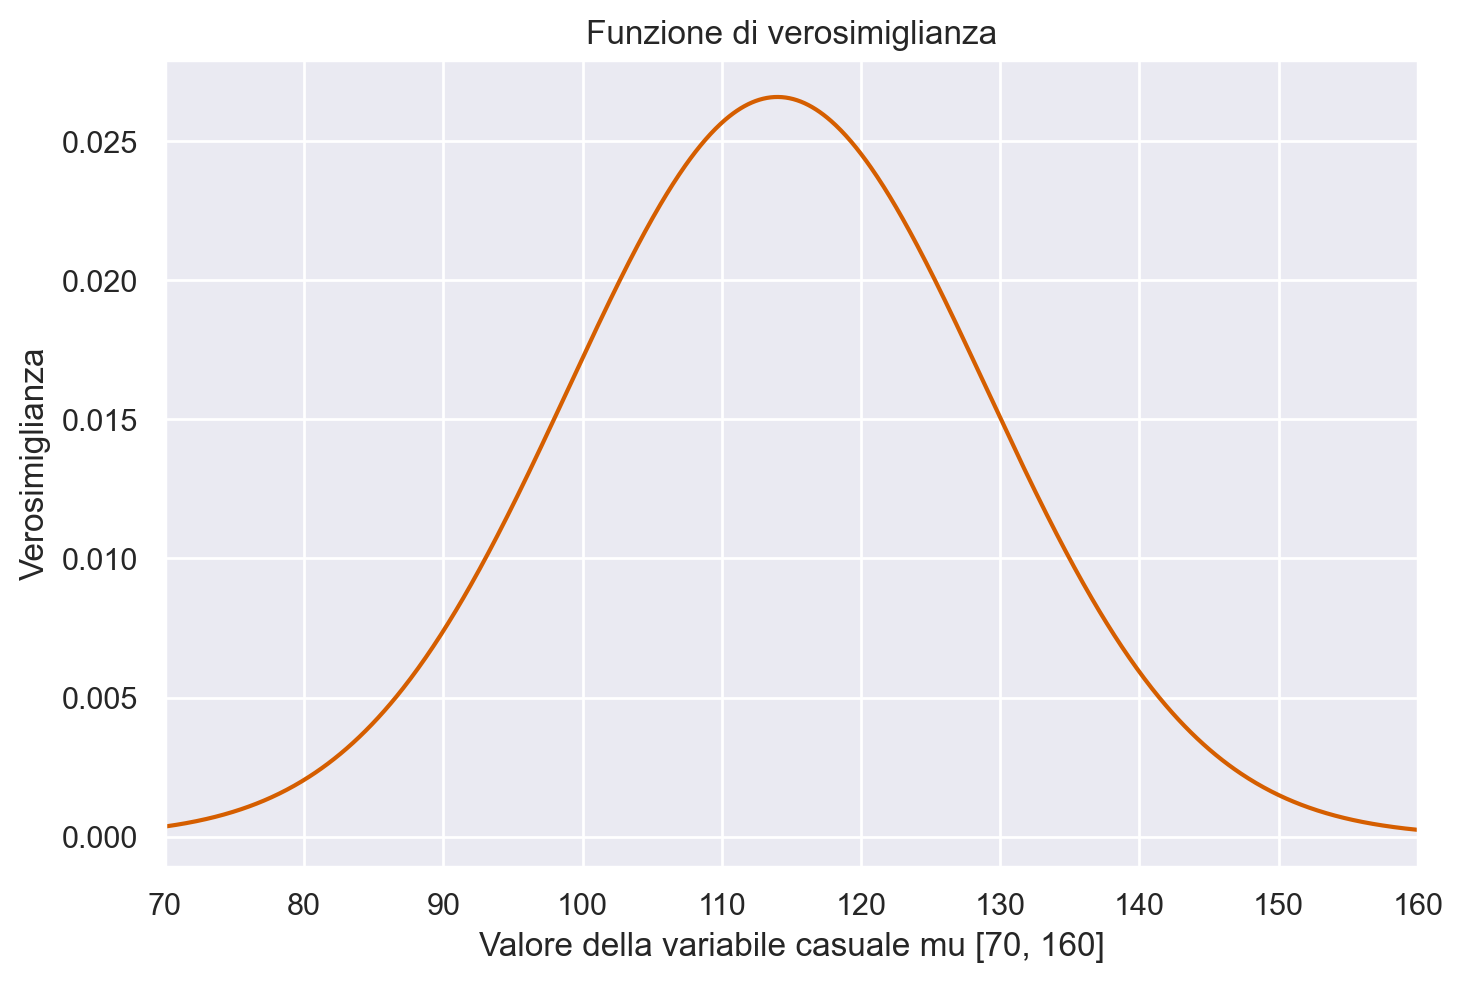

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(mu, f_mu, "r-")
plt.title("Funzione di verosimiglianza")
plt.xlabel("Valore della variabile casuale mu [70, 160]")
plt.ylabel("Verosimiglianza")
plt.xlim([70, 160]);

La funzione di verosimiglianza così trovata ha la forma della distribuzione Gaussiana. Nel caso di una singola osservazione, *ma solo in questo caso*, ha anche un'area unitaria. Per l'esempio presente, la moda della funzione di verosimiglianza è 114.

In [19]:
l = stats.norm.pdf(y, loc=mu, scale=15)
mu[l.argmax()]

113.96396396396396

### Un campione casuale indipendente da una distribuzione gaussiana

Consideriamo ora il caso più generale di un campione casuale indipendente di $n$ osservazioni tratte da una distribuzione gaussiana. Possiamo pensare a questo campione come ad una sequenza di $n$ realizzazioni i.i.d.della stessa variabile casuale $Y \sim \mathcal{N}(\mu, \sigma)$, estratte casualmente da una popolazione $\mathcal{N}(\mu, \sigma)$. I parametri della distribuzione normale sconosciuti sono $\theta = {\mu, \sigma}$. 

Se le variabili casuali $y_1, y_2, \dots, y_n$ sono i.i.d., la loro densità congiunta è data da: 

$$
\begin{align}
f(y \mid \theta) &= f(y_1 \mid \theta) \cdot f(y_2 \mid \theta) \cdot \; \dots \; \cdot f(y_n \mid \theta)\notag\\
&= \prod_{i=1}^n f(y_i \mid \theta),
\end{align}
$$

laddove $f(\cdot)$ è la densità Gaussiana di parametri $\mu, \sigma$. Tenendo costanti i dati $y$, la funzione di verosimiglianza diventa l'eq. {eq}`eq-gaussian-sim-like`.

Per chiarire l'eq. {eq}`eq-gaussian-sim-like`, consideriamo un esempio che utilizza come dati i valori BDI-II dei trenta soggetti del campione clinico di {cite:t}`zetsche_2019future`. 

In [22]:
y = [
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
]

Ci poniamo l'obiettivo di creare la funzione di verosimiglianza per questi dati, supponendo di sapere (in base ai risultati di ricerche precedenti) che i punteggi BDI-II si distribuiscono secondo la legge Normale e supponendo $\sigma$ noto e uguale alla deviazione standard del campione. 

In [23]:
true_sigma = np.std(y)
true_sigma

6.495810615739622

Per la prima osservazione del campione ($y_1 = 26$) abbiamo

$$
f(26 \mid \mu_0, \sigma=6.50) = \frac{1}{{6.50 \sqrt {2\pi}}}\exp\left\{{-\frac{(26 - \mu_0)^2}{2\cdot 6.50^2}}\right\}.
$$

Se consideriamo tutte le osservazioni del campione, la densità congiunta è il prodotto delle densità delle singole osservazioni:


$$f(y \mid \mu, \sigma = 6.50) = \, \prod_{i=1}^n f(y_i \mid \mu, \sigma = 6.50).$$ 

Utilizzando i dati del campione e assumendo $\sigma=6.50$, l'ordinata della funzione di verosimiglianza in corrispondenza di $\mu_0$ è data dal prodotto delle densità di ogni singola osservazione:

$$
\begin{aligned}
\mathcal{L}(\mu_0, \sigma=6.50 \mid y) =& \, \prod_{i=1}^{30} f(y_i \mid \mu_0, \sigma = 6.50) = \notag\\
& \frac{1}{{6.50 \sqrt {2\pi}}}\exp\left\{{-\frac{(26 - \mu_0)^2}{2\cdot 6.50^2}}\right\} \times \notag\\
 & \frac{1}{{6.61 \sqrt {2\pi}}}\exp\left\{{-\frac{(35 - \mu_0)^2}{2\cdot 6.50^2}}\right\} \times  \notag\\
& \vdots \notag\\
 & \frac{1}{{6.61 \sqrt {2\pi}}}\exp\left\{{-\frac{(22 - \mu_0)^2}{2\cdot 6.50^2}}\right\}.
\end{aligned}
$$

Il valore $\mu_0$ rappresenta uno dei possibili valori del parametro $\mu$. Se prendiamo in considerazione 1000 valori possibili per $\mu$, allora dobbiamo ripetere i calcoli precedenti 1000 volte, ovvero una volta per ciascuno dei 1000 valori $\mu$ considerati.

È più conveniente svolgere i calcoli usando il logaritmo della verosimiglianza. In Python definiamo la funzione di log-verosimiglianza, `log_likelihood()`, che prende come argomenti `y`, `mu` e `sigma = 6.50`:

In [24]:
def log_likelihood(y, mu, sigma=true_sigma):
    return np.sum(stats.norm.logpdf(y, loc=mu, scale=true_sigma))

Consideriamo, ad esempio, il valore $\mu_0 = \bar{y}$, ovvero


In [25]:
bar_y = np.mean(y)
print(bar_y)

30.933333333333334


L'ordinata della funzione di log-verosimiglianza in corrispondenza di $\mu = 30.93$ è


In [26]:
print(log_likelihood(y, 30.93, sigma=true_sigma))

-98.70288339960591


Troviamo ora i valori della log-verosimiglianza per ciascuno dei 1000 valori $\mu$ nell'intervallo $[\bar{y} - 2 \sigma, \bar{y} + 2 \sigma]$. Iniziamo a definire il vettore `mu`.


In [27]:
mu = np.linspace(np.mean(y) - 2 * np.std(y), np.mean(y) + 2 * np.std(y), num=1000)

Troviamo il valore dell'ordinata della funzione di log-verosimiglianza in corrispondenza di ciascuno dei 1000 valori `mu` che abbiamo definito.

In [28]:
ll = [log_likelihood(y, mu_val, true_sigma) for mu_val in mu]

Nel caso di un solo parametro sconosciuto (nel caso presente, $\mu$) è possibile rappresentare la log-verosimiglianza con una curva che interpola i punti (`mu`, `ll`). Tale funzione descrive la *credibilità relativa* che può essere attribuita ai valori del parametro $\mu$ alla luce dei dati osservati.

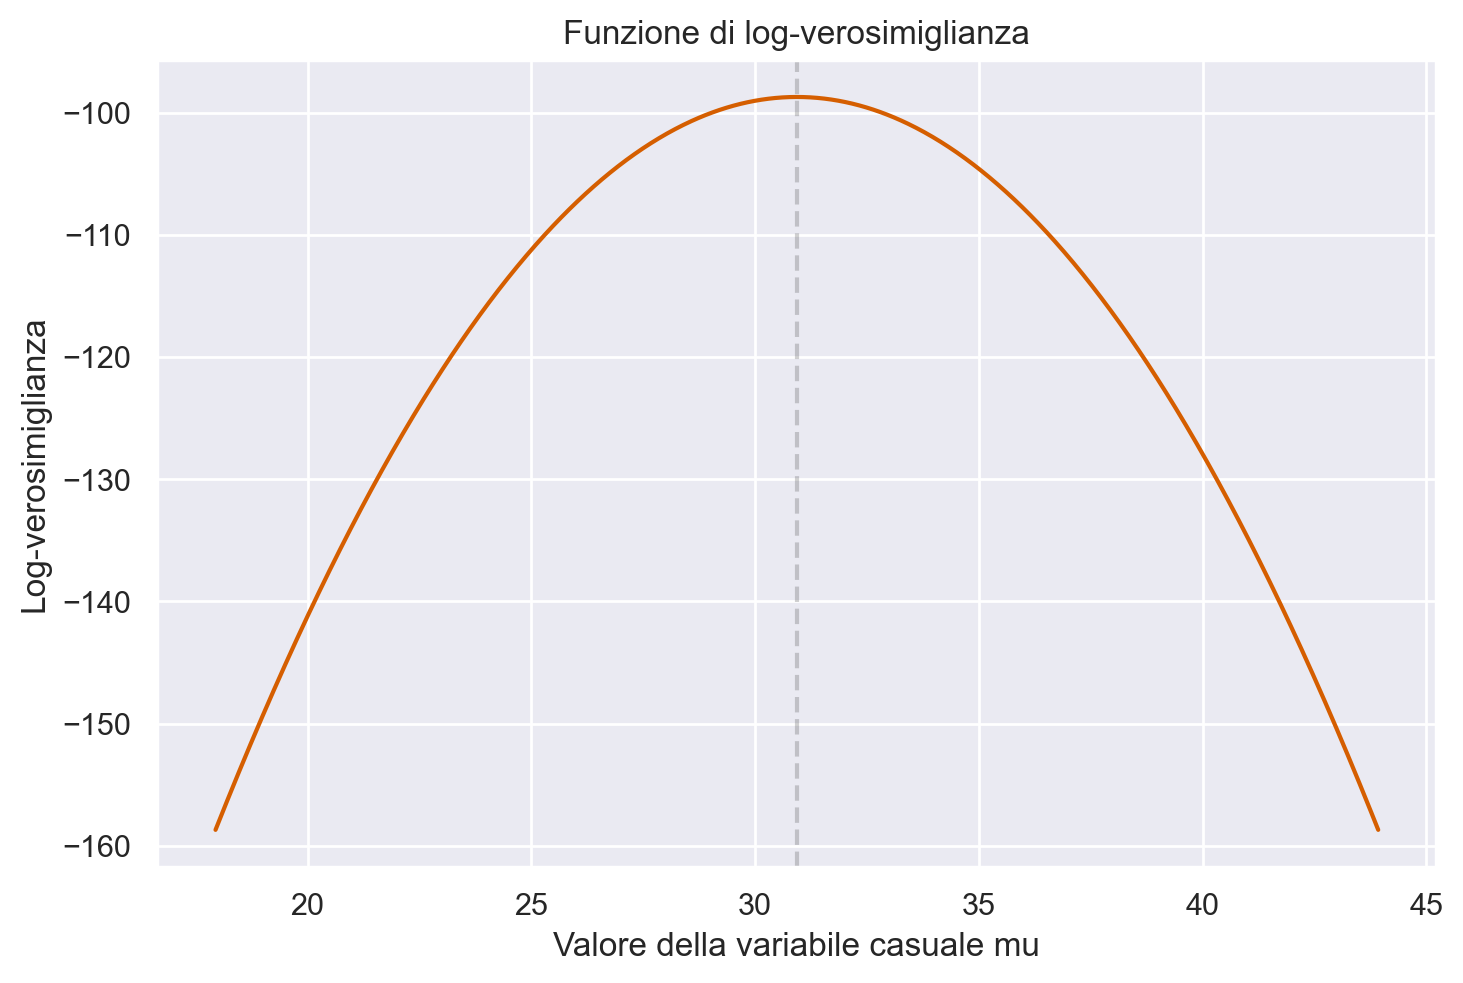

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(mu, ll, "r-")
plt.title("Funzione di log-verosimiglianza")
plt.xlabel("Valore della variabile casuale mu")
plt.ylabel("Log-verosimiglianza")
plt.axvline(x=np.mean(y), color="k", alpha=0.2, ls="--");

Il valore $\mu$ più credibile corrisponde al massimo della funzione di log-verosimiglinza e viene detto *stima di massima verosimiglianza*.

Il massimo della funzione di log-verosimiglianza, ovvero 30.93 per l'esempio in discussione, è identico alla media dei dati campionari. 

## Derivazione formale

Le stime di massima verosimiglianza per i parametri $\mu$ e $\sigma$ possono essere trovate attraverso il calcolo differenziale. Iniziamo con la trasformazione logaritmica della funzione di verosimiglianza:

$$
\begin{aligned}
\log(L(Y\mid\theta)) &= \log\big((2\pi\sigma^2)^{-n/2} \exp{\big(-\frac{1}{2\sigma^2} \sum^n_{j=1}(y_i-\mu)^2\big)\big)} \\
&= -\frac{n}{2}\log(2\pi)-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\sum_{j=1}^{n}(y_i-\mu)^2.
\end{aligned}
$$

La massimizzazione della probabilità dei nostri dati può essere scritta come:

$$
\max_{\mu,\sigma^2}\log(L(X\mid\theta)).
$$

Espandendo i nostri parametri, abbiamo $\log(L(X|\mu, \sigma))$. Per trovare la stima di massima verosimiglianza, utilizziamo le derivate parziali, poiché ci sono due variabili incognite: $\mu$ e $\sigma$. Concentriamoci sulla stima di $\mu$; lo calcoliamo come segue:

$$
\begin{aligned}
& \quad \frac{\partial}{\partial \mu} \log(L(Y \mid \mu, \sigma)) \\
&= \frac{\partial}{\partial \mu} \big(-\frac{n}{2}\log(2\pi)-\frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2}\sum_{j=1}^{n}(y_i-\mu)^2\big)
\\
&= \sum^n_{j=1} \frac{(y_i - \mu)}{\sigma^2}.
\end{aligned}
$$

Impostando l'espressione sopra uguale a zero, otteniamo

$$
\sum^n_{j=1} \frac{(y_i - \mu)}{\sigma^2} = 0.
$$

Quindi

$$
\begin{aligned}
\hat\mu &= \frac{\sum^n_{j=1}y_i}{n} \\
\hat\mu &= \bar y.
\end{aligned}
$$

In altre parole, la stima di massima verosimiglianza del parametro $\mu$ è la media campionaria. In modo corrispondente, si può dimostrare che la stima di massima verosimiglianza del parametro $\sigma$ è la deviazione standard campionaria.

## Commenti e considerazioni finali 

In conclusione, la funzione di verosimiglianza costituisce un ponte fondamentale tra i parametri di un modello statistico e i dati osservati. Attraverso questa funzione, otteniamo informazioni preziose sulla plausibilità dei dati alla luce dei parametri del modello. La sua formulazione coinvolge tre elementi chiave: il modello statistico che descrive la generazione dei dati, i possibili valori dei parametri del modello e i dati effettivamente osservati. La funzione di verosimiglianza svolge un ruolo centrale nell'inferenza statistica, consentendoci di valutare la compatibilità tra i dati osservati e i diversi valori dei parametri del modello. La sua comprensione e il suo corretto utilizzo sono essenziali per il processo di analisi dei dati e l'interpretazione dei risultati. Un importante esempio di applicazione dei concetti descritti in questo capitolo è fornito nell'appendice {ref}`rescorla-wagner-appendix`.

## Watermark

In [56]:
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sat Jul 15 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.0

seaborn   : 0.12.2
arviz     : 0.16.0
scipy     : 1.10.1
numpy     : 1.25.0
pandas    : 1.5.3
matplotlib: 3.7.1

Watermark: 2.4.3

